In [1]:
"""
Tutorial: Predicting California Housing Prices using Support Vector Regression (SVR)

Overview:
This tutorial demonstrates how to apply SVR with different kernels to the California Housing dataset.
It covers data preprocessing, model training, evaluation, and the creation of teaching visualizations,
including performance comparison, predicted vs. true scatter plots, residual analysis, and feature correlation.

Date: 3/27/2025
"""

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Set visualization style (colorblind-friendly)
sns.set(style="whitegrid", palette="viridis")

# %% [code]
# Load the California Housing dataset as a pandas DataFrame
cal_housing = fetch_california_housing(as_frame=True)
df = cal_housing.frame
print("Dataset preview:")
df.head()


Dataset preview:


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
# Separate features and target variable
X = df.drop(columns='MedHouseVal')
y = df['MedHouseVal']

In [4]:
# Scale the features to improve SVR performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Split the dataset into training and testing sets (80:20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)
print(f"Training set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")

Training set size: 16512, Test set size: 4128


In [6]:
# Define a function to train and evaluate an SVR model with a given kernel
def train_evaluate_svr(kernel, **kwargs):
    """
    Trains an SVR model with the specified kernel and parameters.
    Returns the trained model, predictions, and evaluation metrics.
    """
    model = SVR(kernel=kernel, **kwargs)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    return model, y_pred, mse, mae, r2

In [7]:
# Train SVR models with different kernels: linear, polynomial, and RBF
kernels = ['linear', 'poly', 'rbf']
models = {}
results = {}

In [8]:
print("\nTraining SVR models with different kernels:")
for kernel in kernels:
    print(f"\n--- Kernel: {kernel.upper()} ---")
    # For polynomial kernel, set degree to 3 for a moderate complexity
    params = {'degree': 3} if kernel == 'poly' else {}
    model, y_pred, mse, mae, r2 = train_evaluate_svr(kernel, **params)
    models[kernel] = model
    results[kernel] = {'MSE': mse, 'MAE': mae, 'R2': r2}
    print(f"MSE: {mse:.3f}, MAE: {mae:.3f}, R2: {r2:.3f}")



Training SVR models with different kernels:

--- Kernel: LINEAR ---
MSE: 0.579, MAE: 0.512, R2: 0.558

--- Kernel: POLY ---
MSE: 1.036, MAE: 0.584, R2: 0.209

--- Kernel: RBF ---
MSE: 0.355, MAE: 0.398, R2: 0.729


In [9]:
# Create a DataFrame for results and display it
results_df = pd.DataFrame(results).T
print("\nPerformance Metrics for SVR models:")
results_df


Performance Metrics for SVR models:


,MSE,MAE,R2
linear,0.579250,0.511972,0.557962
poly,1.035982,0.584494,0.209421
rbf,0.355198,0.397763,0.728941


<ipython-input-10-4e5a80e9d0f2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=results_df.index, y='R2', data=results_df, palette='viridis')


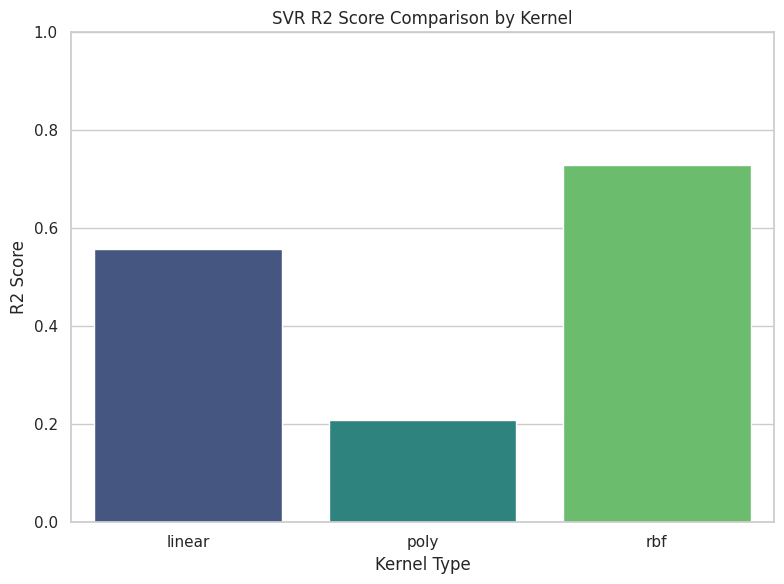

In [10]:
# Visualization 1: Bar Plot for R2 Score Comparison
plt.figure(figsize=(8,6))
sns.barplot(x=results_df.index, y='R2', data=results_df, palette='viridis')
plt.title('SVR R2 Score Comparison by Kernel')
plt.xlabel('Kernel Type')
plt.ylabel('R2 Score')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

In [11]:
# Identify best model based on R2 score
best_kernel = results_df['R2'].idxmax()
print(f"\nBest kernel based on R2 score: {best_kernel.upper()}")


Best kernel based on R2 score: RBF


In [12]:
# Visualization 2: Scatter Plot of True vs. Predicted values for the best model
best_model = models[best_kernel]
y_pred_best = best_model.predict(X_test)

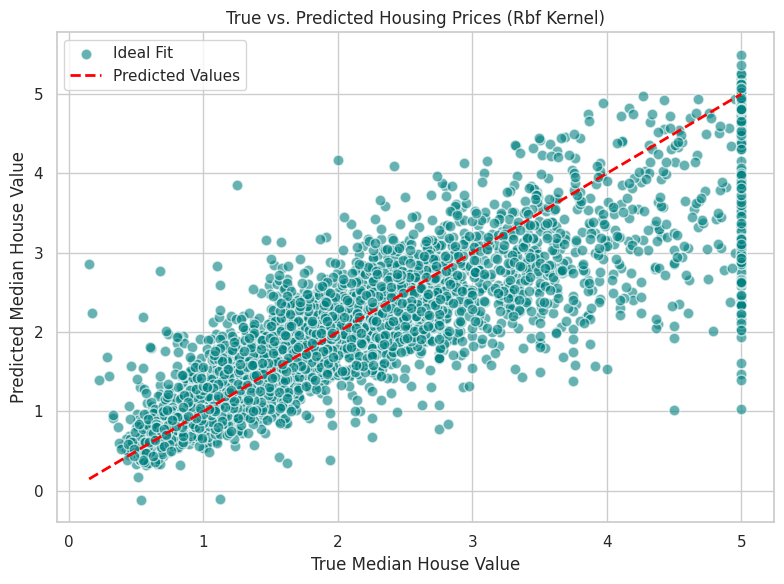

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_best, alpha=0.6, color='teal', edgecolors='w', s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title(f'True vs. Predicted Housing Prices ({best_kernel.capitalize()} Kernel)')
plt.xlabel('True Median House Value')
plt.ylabel('Predicted Median House Value')
plt.legend(['Ideal Fit', 'Predicted Values'])
plt.tight_layout()
plt.show()

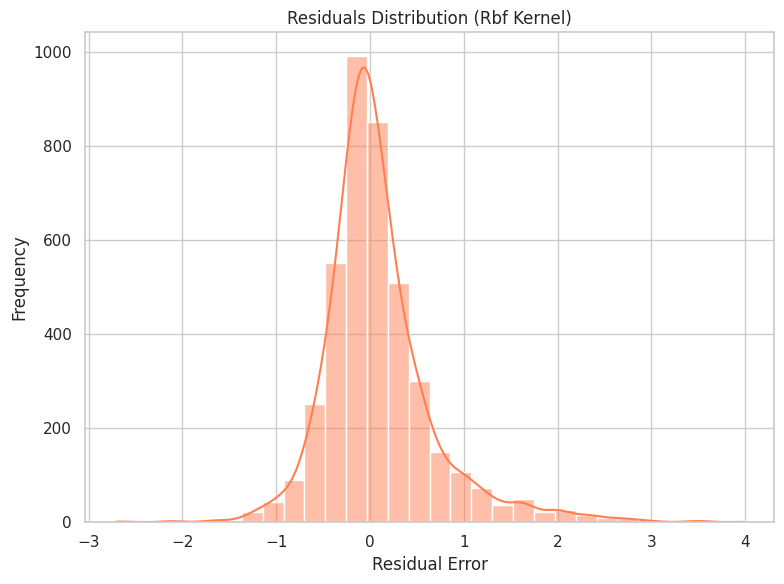

In [14]:
# Visualization 3: Histogram of Residuals for the best model
residuals = y_test - y_pred_best
plt.figure(figsize=(8,6))
sns.histplot(residuals, kde=True, color='coral', bins=30)
plt.title(f'Residuals Distribution ({best_kernel.capitalize()} Kernel)')
plt.xlabel('Residual Error')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

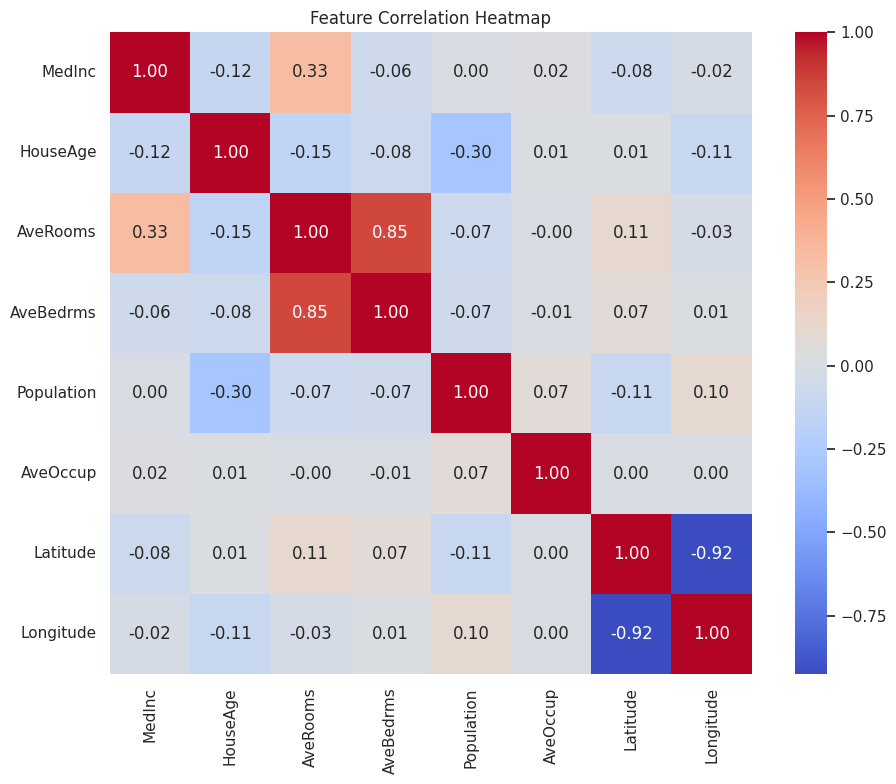

In [15]:
# Additional Visualization: Feature Correlation Heatmap
plt.figure(figsize=(10,8))
corr_matrix = pd.DataFrame(X_scaled, columns=X.columns).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()